In [4]:
#Step 1: Data Loading and Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
data = pd.read_excel('/content/combined_data_final_EB.xlsx')

# Inspect the dataset
print(data.head())
print(data.info())

# Step 1: Check for missing values
missing_values = data.isnull().sum()

# Step 2: Convert 'date' and 'time' to datetime format for easier manipulation
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time

# Step 3: Encode categorical variables if needed (e.g., weekend/holiday, stampede, Day_Type)
# Using binary encoding for 'weekend/holiday (y/n)' and 'stampede (y/n)'
data['weekend/holiday (y/n)'] = data['weekend/holiday (y/n)'].map({'y': 1, 'n': 0})
data['stampede (y/n)'] = data['stampede (y/n)'].map({'y': 1, 'n': 0})

# Encode 'Day_Type' using one-hot encoding
data = pd.get_dummies(data, columns=['Day_Type'], prefix='DayType')

# Step 4: Display the cleaned data and missing values summary
missing_values, data.head()


        date      time  vehicle count weekend/holiday (y/n) stampede (y/n)  \
0 2023-08-01  00:00:00             29                     n              n   
1 2023-08-01  00:15:00             31                     n              n   
2 2023-08-01  00:30:00             32                     n              n   
3 2023-08-01  00:45:00             15                     n              n   
4 2023-08-01  01:00:00             13                     n              n   

   temp. (C)  daily precip. (mm)  wind (km/h) Day_Type  
0       12.8                 0.0           10    Sunny  
1       12.8                 0.0           10    Sunny  
2       12.8                 0.0           10    Sunny  
3       12.8                 0.0           10    Sunny  
4       12.0                 0.0            7    Sunny  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------           

(date                     0
 time                     0
 vehicle count            0
 weekend/holiday (y/n)    0
 stampede (y/n)           0
 temp. (C)                0
 daily precip. (mm)       0
 wind (km/h)              0
 Day_Type                 0
 dtype: int64,
         date      time  vehicle count  weekend/holiday (y/n)  stampede (y/n)  \
 0 2023-08-01  00:00:00             29                      0               0   
 1 2023-08-01  00:15:00             31                      0               0   
 2 2023-08-01  00:30:00             32                      0               0   
 3 2023-08-01  00:45:00             15                      0               0   
 4 2023-08-01  01:00:00             13                      0               0   
 
    temp. (C)  daily precip. (mm)  wind (km/h)  DayType_Rainy  DayType_Snowy  \
 0       12.8                 0.0           10          False          False   
 1       12.8                 0.0           10          False          False   
 2   

In [5]:
#Step 2: Reshape Data for LSTM

# Re-import necessary libraries
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Reload the dataset to ensure it's defined in this session context
file_path = '/content/combined_data_final_EB.xlsx'
data = pd.read_excel(file_path)

# Define features and target variable
features = ['vehicle count', 'temp. (C)', 'daily precip. (mm)', 'wind (km/h)', 'weekend/holiday (y/n)', 'stampede (y/n)']
target = 'vehicle count'

# Ensure 'weekend/holiday (y/n)' and 'stampede (y/n)' columns are encoded to binary
data['weekend/holiday (y/n)'] = data['weekend/holiday (y/n)'].map({'y': 1, 'n': 0})
data['stampede (y/n)'] = data['stampede (y/n)'].map({'y': 1, 'n': 0})

# Filter the data to include only the selected features
data_features = data[features]

# Initialize and apply the MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_features)
data_scaled_df = pd.DataFrame(data_scaled, columns=features)

# Define sequence length for LSTM input
sequence_length = 24  # 24-hour sequence window

# Create sequences for LSTM input
X, y = [], []

for i in range(sequence_length, len(data_scaled_df)):
    X.append(data_scaled_df.iloc[i-sequence_length:i].values)
    y.append(data_scaled_df.iloc[i][data_features.columns.get_loc(target)])

# Convert X and y to numpy arrays
X, y = np.array(X), np.array(y)

# Verify the shapes of X and y for LSTM input
X.shape, y.shape


<ipython-input-5-769839126523>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data_scaled_df.iloc[i][data_features.columns.get_loc(target)])


((35112, 24, 6), (35112,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - loss: 0.0117 - val_loss: 0.0079
Epoch 2/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 0.0020 - val_loss: 0.0066
Epoch 3/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0017 - val_loss: 0.0058
Epoch 4/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 5/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 6/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 7/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 8/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 9/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 10/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 11/50
878/878 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 12/50
878/878 ━━━━━━━━━━

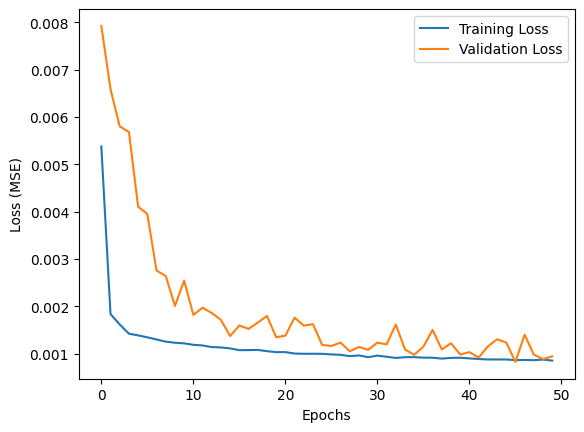

In [ ]:
#Step 3: Build and Train the LSTM Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1: Define the LSTM model architecture
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Step 3: Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 4 (Optional): Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Mean Squared Error (MSE): 0.0009414954903297609
Mean Absolute Error (MAE): 0.021553744028958856


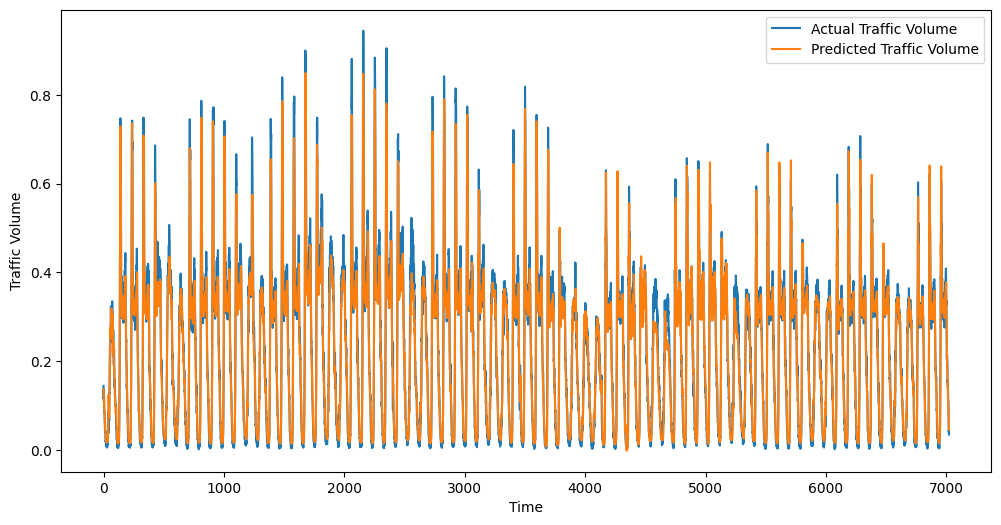

In [ ]:
#Step 4: Model Evaluation and Prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming the last 20% of the data is for testing
test_size = int(0.2 * len(X))
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# Evaluate the model on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Traffic Volume')
plt.plot(y_pred, label='Predicted Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


<ipython-input-13-e7ad8594a159>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data_scaled_df.iloc[i][data_features.columns.get_loc(target)])


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


702/702 ━━━━━━━━━━━━━━━━━━━━ 86s 117ms/step - loss: 0.0151 - val_loss: 0.0012
Epoch 2/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 3/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 139s 115ms/step - loss: 0.0023 - val_loss: 9.0384e-04
Epoch 4/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 5/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - loss: 0.0018 - val_loss: 8.3972e-04
Epoch 6/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 83s 117ms/step - loss: 0.0018 - val_loss: 9.1325e-04
Epoch 7/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - loss: 0.0017 - val_loss: 7.3194e-04
Epoch 8/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - loss: 0.0016 - val_loss: 7.8855e-04
Epoch 9/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - loss: 0.0016 - val_loss: 6.8304e-04
Epoch 10/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 89s 126ms/step - loss: 0.0015 - val_loss: 6.5911e-04
Epoch 11/30
702/702 ━━━━━━━━━━━━━━━━━━━━ 135s 117ms/step - loss: 0.0015 - val_loss: 8.1385

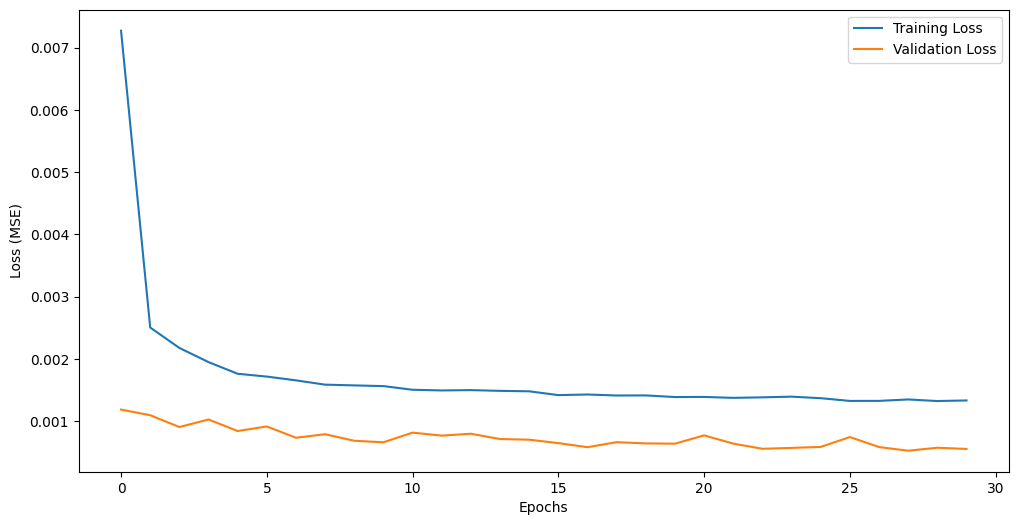

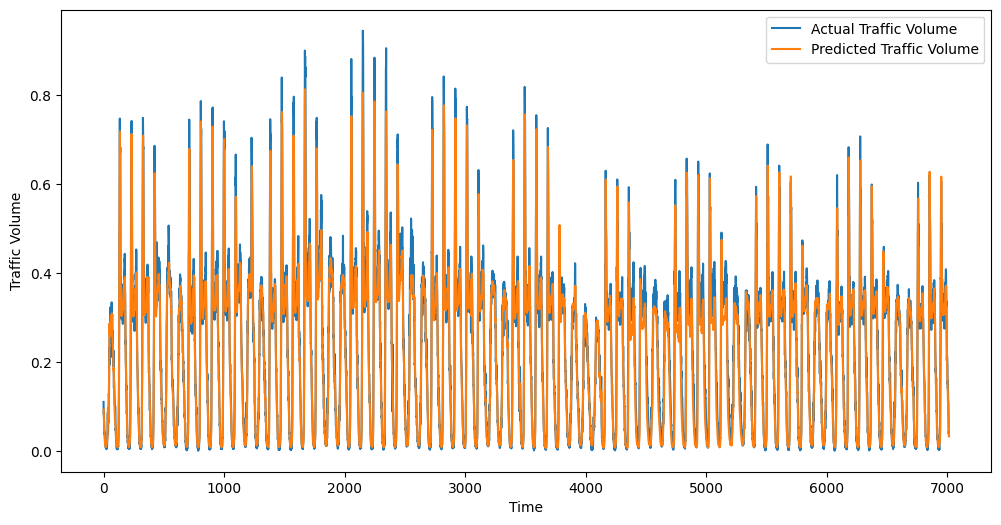

In [ ]:
# Reload and preprocess data (assuming you have already loaded the data in previous steps)
file_path = '/content/combined_data_final_EB.xlsx'
data = pd.read_excel(file_path)

# Encode categorical columns
data['weekend/holiday (y/n)'] = data['weekend/holiday (y/n)'].map({'y': 1, 'n': 0})
data['stampede (y/n)'] = data['stampede (y/n)'].map({'y': 1, 'n': 0})

# Define features and target
features = ['vehicle count', 'temp. (C)', 'daily precip. (mm)', 'wind (km/h)', 'weekend/holiday (y/n)', 'stampede (y/n)']
target = 'vehicle count'
data_features = data[features]

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_features)
data_scaled_df = pd.DataFrame(data_scaled, columns=features)

# Adjust sequence length for experimentation
sequence_length = 48  # Change sequence length to capture a longer time window (e.g., 48 hours)

# Create sequences for LSTM
X, y = [], []
for i in range(sequence_length, len(data_scaled_df)):
    X.append(data_scaled_df.iloc[i-sequence_length:i].values)
    y.append(data_scaled_df.iloc[i][data_features.columns.get_loc(target)])
X, y = np.array(X), np.array(y)

# Split data into train and test sets
test_size = int(0.2 * len(X))
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# Define an improved LSTM model with more layers and units
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),  # Increased dropout to prevent overfitting
    LSTM(100, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(50, activation='relu'),  # Final LSTM layer with fewer units
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

# Compile the model with the Adam optimizer
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the improved model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Visualize Predictions vs. Actual Values for Improved Model
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Traffic Volume')
plt.plot(y_pred, label='Predicted Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


In [3]:
#Step 6: Model Deployment and Documentation
from tensorflow.keras.models import load_model
model = load_model("traffic_volume_lstm_model.h5")
model.save("traffic_volume_lstm_model.h5")


def predict_traffic_volume(new_data, scaler, model_path="traffic_volume_lstm_model.h5"):
    # Load the model
    model = load_model(model_path)

    # Scale and reshape data as per model requirements
    new_data_scaled = scaler.transform(new_data)
    new_data_sequence = new_data_scaled.reshape((1, new_data_scaled.shape[0], new_data_scaled.shape[1]))

    # Predict and inverse transform the prediction
    prediction = model.predict(new_data_sequence)
    return scaler.inverse_transform(prediction)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'traffic_volume_lstm_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)